In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("FP.PA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,33.875,34.200001,32.750,8.126554,33.000000,4044084.0
1,2000-01-04,33.000,32.950001,31.650,7.831041,31.799999,6565240.0
2,2000-01-05,31.500,31.750000,30.775,7.634034,31.000000,8296864.0
3,2000-01-06,31.000,31.500000,30.100,7.412402,30.100000,9581504.0
4,2000-01-07,30.500,31.125000,29.900,7.449337,30.250000,16985068.0


In [3]:
df.head()
#data.reset_index(inplace=True)
#data.drop('Date', axis=1, inplace=True)
df.dropna(inplace=True)


In [4]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [63]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [8]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]

In [9]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [10]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
1767/1767 [==============================] - 262s 148ms/step - loss: 9.4260e-04
Epoch 2/2
1767/1767 [==============================] - 173s 98ms/step - loss: 3.1088e-04


In [15]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [17]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [24]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [25]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.8566771166472267

In [33]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

23.895204306627825

In [36]:

### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.8566771166472267

C:\Users\TARUN REDDY A\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


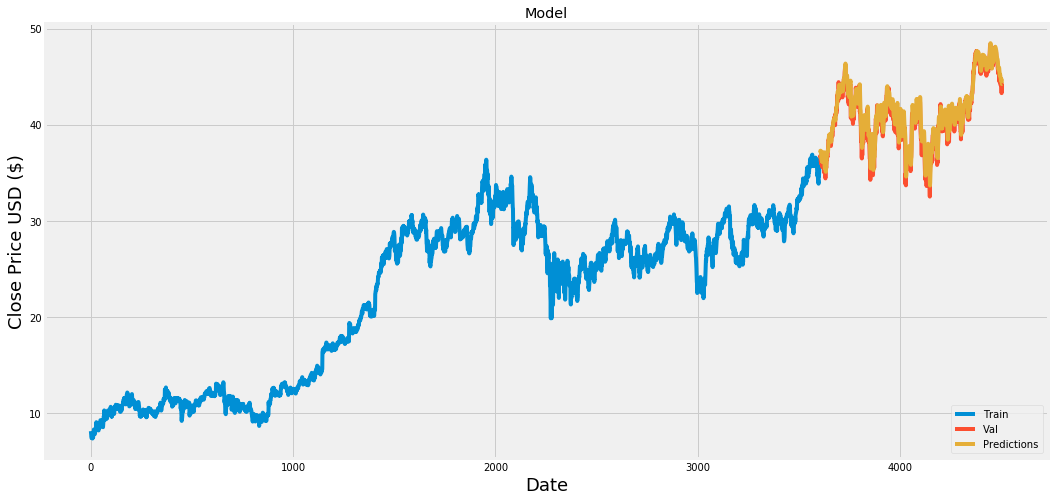

In [41]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [44]:
len(test_data)

958

In [45]:

x_input=test_data[800:].reshape(1,-1)
x_input.shape

(1, 158)

In [46]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.8527929828322343,
 0.8565467400106568,
 0.8540832735906483,
 0.8550217555745727,
 0.8551389926408739,
 0.8536141057803754,
 0.8509161408338679,
 0.8751977277768495,
 0.8776609990456865,
 0.8740246740847368,
 0.875080368741066,
 0.8782475258917428,
 0.8938487155430419,
 0.8977197097877656,
 0.9096845012964261,
 0.9229396567451893,
 0.9332622023575678,
 0.925754858757998,
 0.9347870892180663,
 0.9515613569553745,
 0.9441712748160025,
 0.9529689823556753,
 0.9514245559841266,
 0.9655620874549975,
 0.9696014239790687,
 0.969957916381675,
 0.978155338917698,
 0.9761356706556625,
 0.978155338917698,
 0.9800561845101639,
 0.9831450616471575,
 0.9825509970871005,
 0.9831450616471575,
 0.9793433948561228,
 0.9630672748780604,
 0.9665125468420748,
 0.9729280684246844,
 0.9775612743576412,
 0.9811254909607077,
 0.9719775846437104,
 0.9656810077001532,
 0.9671066114021316,
 0.9518997978746135,
 0.9637801621076874,
 0.9488109207376199,
 0.9524938624346704,
 0.9614040014430456,
 0.956295431650119

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=158
i=0
while(i<30):
    
    if(len(temp_input)>158):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.90121686]
159
1 day input [0.85654674 0.85408327 0.85502176 0.85513899 0.85361411 0.85091614
 0.87519773 0.877661   0.87402467 0.87508037 0.87824753 0.89384872
 0.89771971 0.9096845  0.92293966 0.9332622  0.92575486 0.93478709
 0.95156136 0.94417127 0.95296898 0.95142456 0.96556209 0.96960142
 0.96995792 0.97815534 0.97613567 0.97815534 0.98005618 0.98314506
 0.982551   0.98314506 0.97934339 0.96306727 0.96651255 0.97292807
 0.97756127 0.98112549 0.97197758 0.96568101 0.96710661 0.9518998
 0.96378016 0.94881092 0.95249386 0.961404   0.95629543 0.94263307
 0.93027754 0.92920825 0.93063403 0.92528781 0.94085105 0.93978184
 0.92837671 0.93324759 0.94738522 0.95926558 0.9628297  0.95974083
 0.95997847 0.95677077 0.94774161 0.95094941 0.97055188 0.96829464
 0.96793825 0.9547511  0.94298956 0.93847498 0.9551075  0.95617661
 0.9628297  0.96176049 0.95403829 0.94120744 0.93229723 0.94358353
 0.93966301 0.92065441 0.93681171 0.9403758  0.94584087 0.92899134
 0.93549041 0.93356481 0.93982316 

5 day output [[0.9353667]]
6 day input [0.85091614 0.87519773 0.877661   0.87402467 0.87508037 0.87824753
 0.89384872 0.89771971 0.9096845  0.92293966 0.9332622  0.92575486
 0.93478709 0.95156136 0.94417127 0.95296898 0.95142456 0.96556209
 0.96960142 0.96995792 0.97815534 0.97613567 0.97815534 0.98005618
 0.98314506 0.982551   0.98314506 0.97934339 0.96306727 0.96651255
 0.97292807 0.97756127 0.98112549 0.97197758 0.96568101 0.96710661
 0.9518998  0.96378016 0.94881092 0.95249386 0.961404   0.95629543
 0.94263307 0.93027754 0.92920825 0.93063403 0.92528781 0.94085105
 0.93978184 0.92837671 0.93324759 0.94738522 0.95926558 0.9628297
 0.95974083 0.95997847 0.95677077 0.94774161 0.95094941 0.97055188
 0.96829464 0.96793825 0.9547511  0.94298956 0.93847498 0.9551075
 0.95617661 0.9628297  0.96176049 0.95403829 0.94120744 0.93229723
 0.94358353 0.93966301 0.92065441 0.93681171 0.9403758  0.94584087
 0.92899134 0.93549041 0.93356481 0.93982316 0.9328426  0.93079661
 0.93777715 0.94259128 0.

10 day output [[0.9672783]]
11 day input [0.87824753 0.89384872 0.89771971 0.9096845  0.92293966 0.9332622
 0.92575486 0.93478709 0.95156136 0.94417127 0.95296898 0.95142456
 0.96556209 0.96960142 0.96995792 0.97815534 0.97613567 0.97815534
 0.98005618 0.98314506 0.982551   0.98314506 0.97934339 0.96306727
 0.96651255 0.97292807 0.97756127 0.98112549 0.97197758 0.96568101
 0.96710661 0.9518998  0.96378016 0.94881092 0.95249386 0.961404
 0.95629543 0.94263307 0.93027754 0.92920825 0.93063403 0.92528781
 0.94085105 0.93978184 0.92837671 0.93324759 0.94738522 0.95926558
 0.9628297  0.95974083 0.95997847 0.95677077 0.94774161 0.95094941
 0.97055188 0.96829464 0.96793825 0.9547511  0.94298956 0.93847498
 0.9551075  0.95617661 0.9628297  0.96176049 0.95403829 0.94120744
 0.93229723 0.94358353 0.93966301 0.92065441 0.93681171 0.9403758
 0.94584087 0.92899134 0.93549041 0.93356481 0.93982316 0.9328426
 0.93079661 0.93777715 0.94259128 0.95366384 0.96184787 0.95101603
 0.96991157 0.97592927 0.9

15 day output [[0.97910523]]
16 day input [0.9332622  0.92575486 0.93478709 0.95156136 0.94417127 0.95296898
 0.95142456 0.96556209 0.96960142 0.96995792 0.97815534 0.97613567
 0.97815534 0.98005618 0.98314506 0.982551   0.98314506 0.97934339
 0.96306727 0.96651255 0.97292807 0.97756127 0.98112549 0.97197758
 0.96568101 0.96710661 0.9518998  0.96378016 0.94881092 0.95249386
 0.961404   0.95629543 0.94263307 0.93027754 0.92920825 0.93063403
 0.92528781 0.94085105 0.93978184 0.92837671 0.93324759 0.94738522
 0.95926558 0.9628297  0.95974083 0.95997847 0.95677077 0.94774161
 0.95094941 0.97055188 0.96829464 0.96793825 0.9547511  0.94298956
 0.93847498 0.9551075  0.95617661 0.9628297  0.96176049 0.95403829
 0.94120744 0.93229723 0.94358353 0.93966301 0.92065441 0.93681171
 0.9403758  0.94584087 0.92899134 0.93549041 0.93356481 0.93982316
 0.9328426  0.93079661 0.93777715 0.94259128 0.95366384 0.96184787
 0.95101603 0.96991157 0.97592927 0.9886867  1.         0.99109386
 0.99350083 0.991334

20 day output [[0.9789737]]
21 day input [0.95296898 0.95142456 0.96556209 0.96960142 0.96995792 0.97815534
 0.97613567 0.97815534 0.98005618 0.98314506 0.982551   0.98314506
 0.97934339 0.96306727 0.96651255 0.97292807 0.97756127 0.98112549
 0.97197758 0.96568101 0.96710661 0.9518998  0.96378016 0.94881092
 0.95249386 0.961404   0.95629543 0.94263307 0.93027754 0.92920825
 0.93063403 0.92528781 0.94085105 0.93978184 0.92837671 0.93324759
 0.94738522 0.95926558 0.9628297  0.95974083 0.95997847 0.95677077
 0.94774161 0.95094941 0.97055188 0.96829464 0.96793825 0.9547511
 0.94298956 0.93847498 0.9551075  0.95617661 0.9628297  0.96176049
 0.95403829 0.94120744 0.93229723 0.94358353 0.93966301 0.92065441
 0.93681171 0.9403758  0.94584087 0.92899134 0.93549041 0.93356481
 0.93982316 0.9328426  0.93079661 0.93777715 0.94259128 0.95366384
 0.96184787 0.95101603 0.96991157 0.97592927 0.9886867  1.
 0.99109386 0.99350083 0.99133451 0.97665128 0.95462667 0.94836824
 0.95354343 0.9393417  0.97171

26 day output [[0.9854157]]
27 day input [0.97613567 0.97815534 0.98005618 0.98314506 0.982551   0.98314506
 0.97934339 0.96306727 0.96651255 0.97292807 0.97756127 0.98112549
 0.97197758 0.96568101 0.96710661 0.9518998  0.96378016 0.94881092
 0.95249386 0.961404   0.95629543 0.94263307 0.93027754 0.92920825
 0.93063403 0.92528781 0.94085105 0.93978184 0.92837671 0.93324759
 0.94738522 0.95926558 0.9628297  0.95974083 0.95997847 0.95677077
 0.94774161 0.95094941 0.97055188 0.96829464 0.96793825 0.9547511
 0.94298956 0.93847498 0.9551075  0.95617661 0.9628297  0.96176049
 0.95403829 0.94120744 0.93229723 0.94358353 0.93966301 0.92065441
 0.93681171 0.9403758  0.94584087 0.92899134 0.93549041 0.93356481
 0.93982316 0.9328426  0.93079661 0.93777715 0.94259128 0.95366384
 0.96184787 0.95101603 0.96991157 0.97592927 0.9886867  1.
 0.99109386 0.99350083 0.99133451 0.97665128 0.95462667 0.94836824
 0.95354343 0.9393417  0.97171686 0.97171686 0.97219833 0.9587187
 0.95595048 0.9481276  0.946201

In [49]:
day_new=np.arange(1,159)
day_pred=np.arange(159,189)

In [50]:
import matplotlib.pyplot as plt

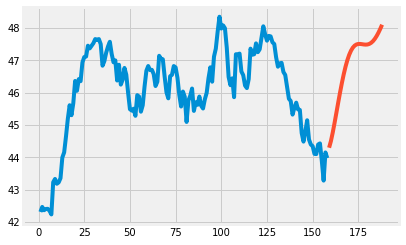

In [64]:
plt.plot(day_new,scaler.inverse_transform(scaled_data[4333:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

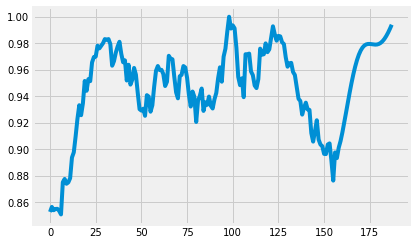

In [66]:
df3=scaled_data.tolist()
df3.extend(lst_output)
plt.plot(df3[4333:])

In [67]:
df3=scaler.inverse_transform(df3).tolist()

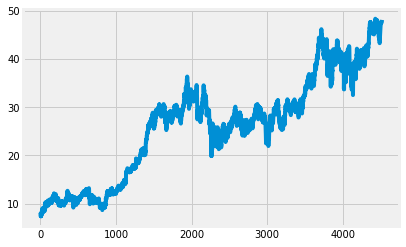

In [68]:
plt.plot(df3)

In [74]:
import pickle
# Saving model to disk
pickle.dump(model,open('model.pkl','wb'))

# Loading model to compare the results
#model = pickle.load(open('model1.pkl','rb'))

TypeError: can't pickle _thread.RLock objects

In [78]:
# Hotfix function
def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__